## Quick View on 20 news groups data set

### 1 read in the data

we need a data structure to restore the statistics about dWord["word"]=set(doc1,doc2,...), dPhrases["phrase"]=set(doc1,...)

In [18]:
dWord=dict()
dPhrase=dict()
with open("input/20newsgroups.txt") as f:
    i=0
    for line in f:
        splitted=line.strip().split(",")
        for element in splitted:
            #invert indices for phrases
            if(" " in element):
                phrase=element
                if(phrase not in dPhrase):
                    dPhrase[phrase]=set([i])
                else:
                    dPhrase[phrase].add(i)
                for word in phrase.split(" "):
                    if(word not in dWord):
                        dWord[word]=set([i])
                    else:
                        dWord[word].add(i)                    
            #invert indices for phrases
            else:
                word=element
                if(word not in dWord):
                    dWord[word]=set([i])
                else:
                    dWord[word].add(i)
        i=i+1
N=i

We use dWord and dPhrase to measure how phrase can be determined by the words. There are 4 examples, "prometheus books", "atheist books", "important things", "clipper chip". 

### 2 Computing the score of phrase

In [19]:
print(dPhrase["prometheus books"])
print(dWord["prometheus"])
print(len(dWord["books"]))

set([0, 708])
set([0, 708])
354


In [20]:
print(dPhrase["atheist books"])
print(len(dWord["atheist"]))
print(len(dWord["books"]))

set([0, 708])
126
354


In [21]:
print(dPhrase["important things"])
print(len(dWord["important"]))
print(len(dWord["things"]))

set([17632, 18499, 3238, 1996, 15851, 17004, 17551, 17525, 17577, 18523, 18603])
586
1419


In [22]:
print(len(dPhrase["clipper chip"]))
print(len(dWord["clipper"]))
print(len(dWord["chip"]))

93
242
440


May be NPMI is a potential metric. NPMI=log(p(x,y)/(p(x)p(y) ))/(- log(p(x,y))), where p(x)=df(x)/|D|.
More information can be referred to the paper [Normalized (Pointwise) Mutual Information in Collocation Extraction](https://svn.spraakdata.gu.se/repos/gerlof/pub/www/Docs/npmi-pfd.pdf).

In [23]:
import math
def computeNPMI(df1,df2,dfPhrase,N):
    p1=(float(df1)+0.01)/float(N)
    p2=(float(df2)+0.01)/float(N)
    p12=(float(dfPhrase)+0.01)/float(N)
    NPMI=math.log(p12/(p1*p2))/(-math.log(p12))
    return NPMI

def computeNPMIforPhrase_2words(phrase,dfPhrase):
    word1,word2=phrase.split(" ")
    df1=len(dWord[word1])
    df2=len(dWord[word2])
    score=computeNPMI(df1,df2,dfPhrase,N)
    return score

def computeNPMIforPhrase(phrase,debug=False):
    splitted=phrase.split(" ")
    result=float("inf")
    dfPhrase=len(dPhrase[phrase])
    numWordInPhrase=len(splitted)
    for i in range(numWordInPhrase-1):
        two_words=" ".join(splitted[i:i+2])
        score=computeNPMIforPhrase_2words(two_words,dfPhrase)
        if(result>score):
            result=score
    if(debug):
        print("%s's NPMI\t%s" %(phrase,str(score)))
    return score

    
computeNPMIforPhrase("prometheus books",debug=True)
computeNPMIforPhrase("atheist books",debug=True)
computeNPMIforPhrase("important things",debug=True)
computeNPMIforPhrase("clipper chip",debug=True)
computeNPMIforPhrase("trouble shooting",debug=True)
computeNPMIforPhrase("general purpose",debug=True)
computeNPMIforPhrase("mirror sites",debug=True)
computeNPMIforPhrase("vga monitor",debug=True)
computeNPMIforPhrase("chinese restaurant syndrome",debug=True)
computeNPMIforPhrase("hicnet medical newsletter page",debug=True)
computeNPMIforPhrase("leftover turkey",debug=True)
computeNPMIforPhrase("white house",debug=True)
computeNPMIforPhrase("university press",debug=True)

prometheus books's NPMI	0.434531454797
atheist books's NPMI	-0.0179827143544
important things's NPMI	-0.186605575741
clipper chip's NPMI	0.527273727295
trouble shooting's NPMI	0.0790239311372
general purpose's NPMI	0.0678641792412
mirror sites's NPMI	0.345965550419
vga monitor's NPMI	0.269547656226
chinese restaurant syndrome's NPMI	0.617371751124
hicnet medical newsletter page's NPMI	0.345722989488
leftover turkey's NPMI	0.664479018325
white house's NPMI	0.430806181314
university press's NPMI	0.175082681879


0.1750826818790686

We sort the phrases according to their scores of NPMI.

In [24]:
dPhraseScore=dict()
for phrase in dPhrase.keys():
    score=computeNPMIforPhrase(phrase)
    dPhraseScore[phrase]=score

In [25]:
from operator import itemgetter
sortedList=sorted(dPhraseScore.items(),key=itemgetter(1),reverse=True)

In [26]:
with open("input/phrase_score.txt","w") as fWriter:
    for phrase,score in sortedList:
        fWriter.write("%s\t%s\n" % (phrase,score))

### 3 Showing the distribution of score

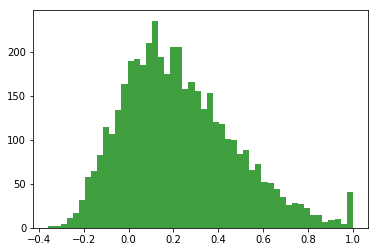

In [27]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(dPhraseScore.values(), 50, facecolor='green', alpha=0.75)
plt.show()

In [28]:
!head -n50 input/phrase_score.txt

sta uartcmd	1.0
devrim tarihi	1.0
sarik ariyak	1.0
heyeti nizamnamesi	1.0
encumeni mecmuasi	1.0
dee dee	1.0
alexei yashin	1.0
patrik juhlin	1.0
amtor selcal	1.0
yelena bonner	1.0
notre dame	1.0
juhana kouhia	1.0
neb dcon dops	1.0
vukela mazbatalari	1.0
diane schwartz	1.0
hakkinda vesaike mustenid malumat	1.0
microtest lanport	1.0
mein kampf	1.0
orhan gunduz	1.0
vernor vinge	1.0
katolik propagandasi	1.0
klux klan	1.0
depo provera	1.0
cesarean deliveries	1.0
security through obscurity	1.0
jef poskanzer	1.0
lozan baris konferansi	1.0
birinci baski	1.0
anasina tarihin soyledikleri	1.0
onur yalcin	1.0
puerto rico	1.0
alliance israelite universelle	1.0
dahiliye nezareti	1.0
escherichia coli	1.0
paxton quigley	1.0
ahalinin ducar olduklari mezalim	1.0
ilmi mudafaalari	1.0
haemophilus influenzae	1.0
deir yassin	0.987370626998
serdar argic	0.987327679749
saudi arabia	0.983422045631
las vegas	0.968596739482
los angeles	0.96358756491
ermeni mezalimi	0.962405050772
maddi hausmann	0.946265507949
tar

In [29]:
!tail -n50 input/phrase_score.txt

space faq	-0.205654506299
ftp software	-0.206300971084
similar problem	-0.20640501725
light years	-0.207060462248
install program	-0.20752517871
big question	-0.209118304792
list address	-0.213008488841
interesting question	-0.21316753174
order form	-0.213826487376
send receive	-0.217080924672
scsi dat tape drive	-0.21749905302
couple years	-0.217759598728
hard drive controller	-0.219914653039
frequently asked question	-0.220122875091
data type	-0.221424872251
question mark	-0.221733294591
data general	-0.227721213658
street new york	-0.231530788698
external hard drive	-0.232050805963
true god	-0.232383679783
real problem	-0.232518516781
human reason	-0.233577786162
graphics information	-0.234670990861
new york times	-0.237355586567
access control list	-0.23902550573
common problem	-0.239545904501
return true	-0.241939535678
great care	-0.241953784249
single drive	-0.243723657396
dos windows	-0.246531809182
mbytes operating system	-0.246993570743
thousand years ago	-0.248888592433
mail

### 4 Testing the method on more data

We rewrite the above script into the file script/linkInformation.py. When we want to use it, just import it and call the function extractLinkInformation(filename,outputfile) where outputfile is "input/phrase_score.txt"

In [30]:
reload(script.linkInformation)

<module 'script.linkInformation' from 'script/linkInformation.pyc'>

In [31]:
import script.linkInformation

In [32]:
script.linkInformation.extractLinkInformation("input/20newsgroups.txt","input/phrase_score.txt")

#### 4.1 Mathematics dataset

In [33]:
script.linkInformation.extractLinkInformation("input/mathematics.txt","input/phrase_score.txt")

In [34]:
!head -n20 input/phrase_score.txt

sankt gallen	1.0
comptes rendus	1.0
humpty dumpty	1.0
corporibus regularibus	1.0
jawaharlal nehru	1.0
retinitis pigmentosa	1.0
ryue nishizawa	1.0
mysterium cosmographicum	1.0
anno domini	1.0
antonin artaud	1.0
morwen thistlethwaite	1.0
battlestar galactica	1.0
jia xian	1.0
kuala lumpur	1.0
asghar qadir	1.0
disquisitiones arithmeticae	1.0
yom kippur	1.0
metamagical themas	1.0
nitin saxena	1.0
houghton mifflin	1.0


In [35]:
!tail -n20 input/phrase_score.txt

standard book number	-0.648023894554
complex systems research	-0.650470123405
quantum information theory	-0.654253313837
elementary number theory	-0.655104686956
zfc set theory	-0.656034687487
musical set theory	-0.659849187281
mathematical set theory	-0.663931236714
independent set problem	-0.664360919509
computational number theory	-0.667108306709
zermelo set theory	-0.668330772059
constructive set theory	-0.673114051071
modern set theory	-0.673114051071
effective descriptive set theory	-0.67837188181
lti system theory	-0.680825639021
combinatorial number theory	-0.689353590659
classical set theory	-0.690895366536
rough set theory	-0.690895366536
additive number theory	-0.693420317494
transcendental number theory	-0.714277984192
fuzzy set theory	-0.73929398386


In [49]:
dWord,dPhrase,N=script.linkInformation.initData("input/mathematics.txt")
dPhraseDF=dict()
for phrase in dPhrase.keys():
    df = len(dPhrase[phrase])
    dPhraseDF[phrase]=df
sortedPhrasesWithPhrequency=sorted(dPhraseDF.items(),key=itemgetter(1),reverse=True)
for i in range(0,20):
    phrase,df=sortedPhrasesWithPhrequency[i]
    print("%s\t%s\t%s" %(phrase,df,float(df)/float(N)) )

united states	1411	0.0504884245178
special case	914	0.0327047625863
closely related	681	0.0243675528679
programming language	624	0.0223279779583
large number	594	0.0212545174795
graph theory	566	0.0202526210327
probability theory	560	0.0200379289369
world war	539	0.0192865066018
vice versa	481	0.0172111496762
probability distribution	470	0.0168175475006
applied mathematics	461	0.016495509357
quantum mechanics	442	0.0158156510538
general relativity	426	0.0152431387984
real numbers	426	0.0152431387984
open source	424	0.0151715747665
number theory	422	0.0151000107346
programming languages	408	0.0145990625112
artificial intelligence	391	0.0139907682399
computational complexity	383	0.0137045121122
united kingdom	374	0.0133824739686


#### 4.2 Argentina dataset

In [51]:
script.linkInformation.extractLinkInformation("input/argentina.txt","input/phrase_score.txt")

In [52]:
!head -n20 input/phrase_score.txt

rada tilly	1.0
luis moglia barth	1.0
rand mcnally	1.0
lionel messi	1.0
dendrocygna viduata	1.0
phalacrocorax atriceps	1.0
sui generis	1.0
tita merello	1.0
cosa nostra	1.0
anastasio somoza	1.0
baruch tenembaum	1.0
alfio basile	1.0
saddam hussein	1.0
cariama cristata	1.0
zwi migdal	1.0
venado tuerto	1.0
drimys winteri	1.0
cabernet sauvignon	1.0
colo colo	1.0
barack obama	1.0


In [53]:
!tail -n20 input/phrase_score.txt

buenos aires municipal	-0.442481453645
barrio san pedro	-0.448220676473
south eastern	-0.45114258639
bank argentina	-0.462713407906
south central chile	-0.463488022777
general san	-0.465741848204
buenos aires city	-0.491415602726
argentine drama	-0.49436192249
argentina national football	-0.495164632075
buenos aires convention	-0.50320174766
central argentine	-0.519896627239
dominio del plata	-0.541577928445
comercial del plata	-0.541577928445
buenos aires provincial	-0.542964618255
downtown buenos aires	-0.55390344958
gran buenos aires	-0.5927363899
north western argentina	-0.615677768311
colonial buenos aires	-0.651707348263
north central argentina	-0.65445731269
harrods buenos aires	-0.694535344376


To Check if we should filter out the frequent phrase such as "south america" and "north america"

In [54]:
dWord,dPhrase,N=script.linkInformation.initData("input/argentina.txt")
print(N)
print(len(dWord["south"]))
print(len(dWord["america"]))
print(len(dPhrase["south america"]))
!grep "south america" input/phrase_score.txt
print(len(dPhrase["south american"]))

8617
1506
973
541
south america	0.418097485075
south american	0.226532917538
south american basketball championship	0.0199085252605
south americans	-0.00634263539086
south american youth	-0.122167062228
southern south america	-0.252965882472
northern south america	-0.363855486721
eastern south america	-0.382101403972
central south america	-0.395703860255
western south america	-0.419144012145
southernmost south america	-0.437690480893
tropical south america	-0.437690480893
306


In [55]:
print(len(dWord["north"]))
print(len(dWord["america"]))
print(len(dPhrase["north america"]))
!grep "north america" input/phrase_score.txt

851
973
78
north america	-0.0443154554414
north american	-0.0940834809526


In [57]:
print(len(dWord["strong"]))
print(len(dWord["winds"]))
print(len(dPhrase["strong winds"]))
!grep "strong winds" input/phrase_score.txt

339
79
23
strong winds	0.33782731222


In [56]:
print(len(dWord["rebelde"]))
print(len(dWord["way"]))
print(len(dPhrase["rebelde way"]))
!grep "rebelde way" input/phrase_score.txt

15
458
4
rebelde way	0.210444255007


In [58]:
print(len(dWord["tropical"]))
print(len(dWord["moist"]))
print(len(dPhrase["tropical moist"]))
!grep "tropical moist" input/phrase_score.txt

259
127
65
tropical moist lowland	0.753622299363
tropical moist	0.580096011959


In [59]:
print(len(dWord["new"]))
print(len(dWord["holland"]))
print(len(dPhrase["new holland"]))
!grep "new holland" input/phrase_score.txt

1494
3
3
new holland	0.220147210908	3


Show the phrase with top frequencies. 

In [45]:
dPhraseDF=dict()
for phrase in dPhrase.keys():
    df = len(dPhrase[phrase])
    dPhraseDF[phrase]=df
sortedPhrasesWithPhrequency=sorted(dPhraseDF.items(),key=itemgetter(1),reverse=True)

In [47]:
for i in range(0,20):
    phrase,df=sortedPhrasesWithPhrequency[i]
    print("%s\t%s\t%s" %(phrase,df,float(df)/float(N)) )

buenos aires	2510	0.291284669839
south america	541	0.0627828710688
united states	518	0.0601137286759
south american	306	0.0355111987931
latin america	293	0.0340025530927
northwestern argentina	269	0.0312173610305
tierra del fuego	262	0.0304050133457
latin american	205	0.023790182198
san luis	201	0.0233259835209
san juan	200	0.0232099338517
argentine film	198	0.0229778345132
greater buenos aires	197	0.0228617848439
world war	189	0.0219333874898
northern argentina	188	0.0218173378206
mar del plata	178	0.020656841128
argentine football	175	0.0203086921202
juan manuel	173	0.0200765927817
argentine government	173	0.0200765927817
united kingdom	172	0.0199605431125
catamarca province	170	0.0197284437739
